# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [32]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/Administrator/Desktop/ML/機器學習概論/'

### 之前做過的處理

In [33]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [34]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [37]:
app_train.drop(app_train[np.isnan(app_train['CNT_CHILDREN'])].index, inplace=True)
app_train['equal_width_CHILDREN']=pd.cut(app_train['CNT_CHILDREN'],3)
app_train['equal_width_CHILDREN'].value_counts()

(-0.019, 6.333]    307490
(6.333, 12.667]        16
(12.667, 19.0]          5
Name: equal_width_CHILDREN, dtype: int64

In [38]:
#equal_width_CHILDREN=np.sort(app_train['equal_width_CHILDREN'].unique())
app_train1 = app_train[['TARGET','equal_width_CHILDREN']]
#print(type(app_train1))
app_train1  = app_train1.groupby('equal_width_CHILDREN').mean()
app_train1

,TARGET
equal_width_CHILDREN,
"(-0.019, 6.333]",0.080725
"(6.333, 12.667]",0.187500
"(12.667, 19.0]",0.000000


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


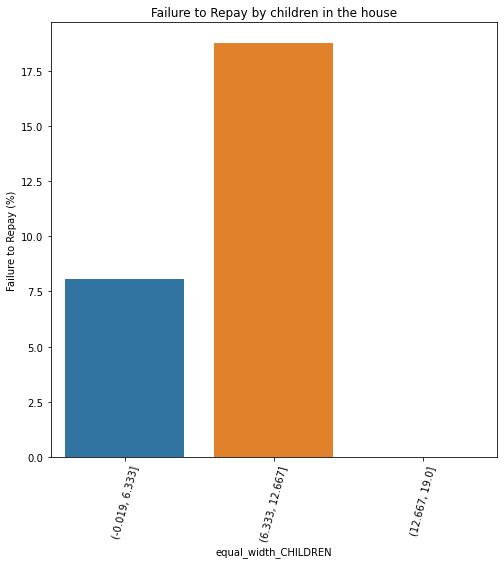

In [39]:
plt.figure(figsize = (8, 8))
px = app_train1.index.astype(str)
py = 100 * app_train1['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('equal_width_CHILDREN'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by children in the house');

可以看到說在家中有6到12個小孩在家中有更高的fail to repay%

In [45]:
app_train.drop(app_train[np.isnan(app_train['CNT_FAM_MEMBERS'])].index, inplace=True)
#app_train['CNT_FAM_MEMBERS'].unique()
app_train['width_FAM_MEMBERS']=pd.cut(app_train['CNT_FAM_MEMBERS'],3)
app_train['width_FAM_MEMBERS'].value_counts()

(0.981, 7.333]     307469
(7.333, 13.667]        33
(13.667, 20.0]          7
Name: width_FAM_MEMBERS, dtype: int64

In [46]:
app_train2 = app_train[['TARGET','width_FAM_MEMBERS']]
#print(type(app_train1))
app_train2  = app_train2.groupby('width_FAM_MEMBERS').mean()
app_train2

,TARGET
width_FAM_MEMBERS,
"(0.981, 7.333]",0.080711
"(7.333, 13.667]",0.272727
"(13.667, 20.0]",0.000000


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


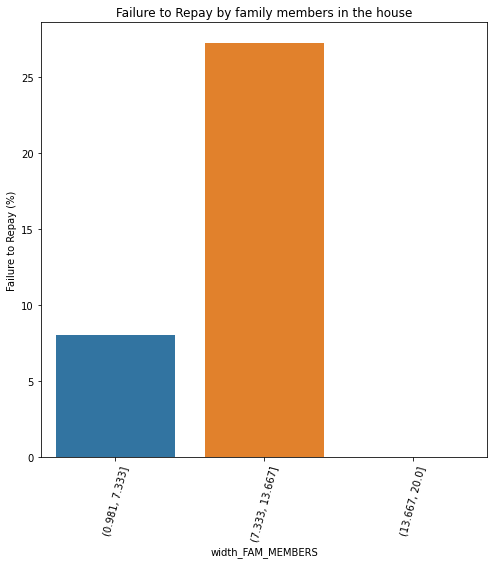

In [47]:
plt.figure(figsize = (8, 8))
px = app_train2.index.astype(str)
py = 100 * app_train2['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('width_FAM_MEMBERS'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by family members in the house');

可以看到說7到13個人的大家庭有更高的fail to repay%